In [ ]:
# Autor: Moisés Martínez
# Correo: moises.martinez@ufv.es
# Título: Example for multi-class classification using TensorFlow (Convolutional architecture)
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
%load_ext tensorboard

In [ ]:
from google.colab import files

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from keras.callbacks import TensorBoard
from keras.preprocessing import image

import numpy as np
import tensorflow as tf
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
local_zip = './animals_test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./train')
local_zip = './animals_test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./test')
zip_ref.close()

In [ ]:
# We create an image generator with augmentation
train_datagen = ImageDataGenerator(
      # We scale pixels between 0 and 1
      rescale = 1./255,
      rotation_range = 30,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        # We define the directory where the training images are located.
        './train/',
        # We transform all images to 96 x 96.
        target_size=(96, 96),
        # We group the images into batches of 128.
        batch_size=128,
        # We specify that the images remain in color (RGB).
        color_mode="rgb",
        # We define a categorical class type.
        class_mode='categorical')

test_datagen = ImageDataGenerator(
    rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
        # We define the directory where the test images are located.
        './test',
        # We transform all images to 96 x 96.
        target_size = (96, 96),
        # We specify that the images remain in color (RGB).
        color_mode = "rgb",
        # We define a categorical class type.
        class_mode = 'categorical')


In [ ]:
# Definition of the image sizes
input_size = 96
num_colors = 3

# Definition of the network layers
layers = [
    # First convolution with 16 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(16,
                        (3,3),
                        activation='relu',
                        input_shape=(input_size,
                                    input_size,
                                    num_colors)),
    # Pooling of size 2 x 2 and stride 1
    keras.layers.MaxPooling2D(2, 2),
    # Second convolution with 32 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(32,
                        (3,3),
                        activation='relu'),
    # Pooling of size 2 x 2 and stride 1
    keras.layers.MaxPooling2D(2,2),
    # Third convolution with 64 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(64,
                        (3,3),
                        activation='relu'),
    # Pooling of size 2 x 2 and stride 1
    keras.layers.MaxPooling2D(2,2),
    # Fourth convolution with 64 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(64,
                        (3,3),
                        activation='relu'),
    # Pooling of size 2 x 2 and stride 1
    keras.layers.MaxPooling2D(2,2),
    # Flattening to transform the information into a vector
    keras.layers.Flatten(),
    # Dense layer with 512 neurons and relu activation function
    keras.layers.Dense(512,
                       activation='relu'),
    # Output layer with softmax activation function
    keras.layers.Dense(3,
                       activation = tf.nn.softmax),
]

model = keras.Sequential(layers, name="animals_multiclass_classification")

In [ ]:
# Optimization algorithm and loss function configuration
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Network structure
model.summary()

In [ ]:
# Definition of the TF Board callback
tensorboard_callback = TensorBoard(
    log_dir = 'logs')

# Training process execution
# Iterations: 15
# Number of steps per iteration: 4
history = model.fit(train_generator,
                    steps_per_epoch = 4,
                    epochs = 150,
                    callbacks = [tensorboard_callback])

# Evaluation of the model using the test set
results = model.evaluate(test_generator)

print(results)

Epoch 1/150
4/4 [==============================] - 3s 717ms/step - loss: 0.4245 - accuracy: 0.8242
Epoch 2/150
4/4 [==============================] - 2s 380ms/step - loss: 0.4481 - accuracy: 0.8063
Epoch 3/150
4/4 [==============================] - 2s 460ms/step - loss: 0.4788 - accuracy: 0.8018
Epoch 4/150
4/4 [==============================] - 2s 367ms/step - loss: 0.4340 - accuracy: 0.8063
Epoch 5/150
4/4 [==============================] - 1s 306ms/step - loss: 0.4346 - accuracy: 0.8176
Epoch 6/150
4/4 [==============================] - 1s 376ms/step - loss: 0.4260 - accuracy: 0.8108
Epoch 7/150
4/4 [==============================] - 2s 369ms/step - loss: 0.3668 - accuracy: 0.8477
Epoch 8/150
4/4 [==============================] - 1s 308ms/step - loss: 0.3767 - accuracy: 0.8581
Epoch 9/150
4/4 [==============================] - 1s 423ms/step - loss: 0.3352 - accuracy: 0.8649
Epoch 10/150
4/4 [==============================] - 2s 392ms/step - loss: 0.2943 - accuracy: 0.8919
Epoch 11/

In [ ]:
%tensorboard --logdir logs

###Utilización del modelo

Para comprobar el funcionamiento del modelo que hemos construido vamos a
construir un cargado de imágenes que permitirá cargar imágenes que tengamos
almacenadas en nuestro disco duro y ejecutará el proceso de inferencia sobre
ellas.

In [ ]:
label_names = ['caballo', 'gato', 'perro']
minimim_value = 0.78

# We use the file insertion system of Colab
uploaded = files.upload()

# Execution of the inference process for each image
for fn in uploaded.keys():

  # Image path configuration
  path = '/content/' + fn

  # Image preparation
  img = image.load_img(path, target_size=(96, 96))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # Image transformation into a tensor
  image_tensor = np.vstack([x])
  # Inference execution
  classes = model.predict(image_tensor)


  found = 0

  for i in range(0, len(classes[0])):

    print(classes)

    if classes[0][i] > minimim_value:
      print(fn + 'se corresponde con la etiqueta ' + label_names[i])
      found = 1

  if found == 0:
    print(fn + ' no se corresponde con ninguna etiqueta ')

KeyboardInterrupt: 

47
16
45
32
22
32
20
64
10
64
8
64
4
64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


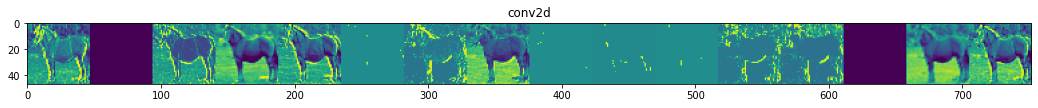

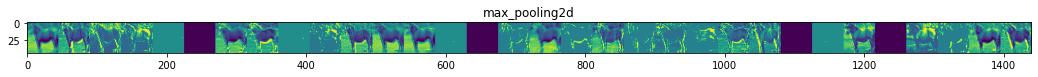

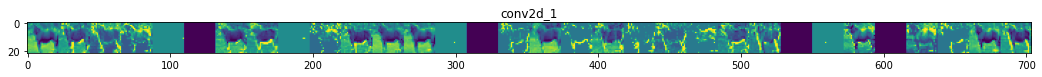

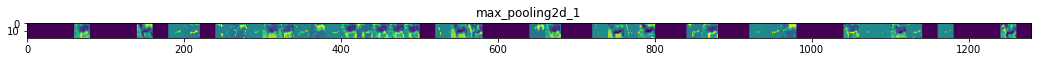

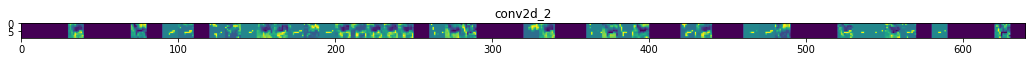

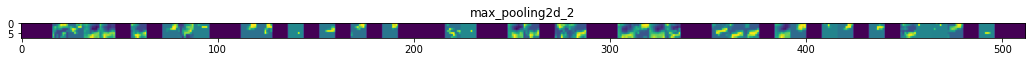

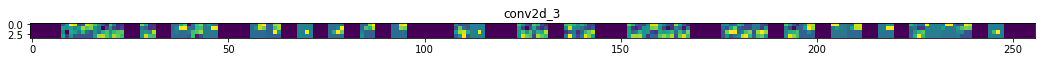

In [ ]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
img_path = '/content/train/caballo/OIP-xjaXHdCZGkQbTuQdxhb6TwHaGX.jpeg'

img = load_img(img_path, target_size=(input_size, input_size))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

num_layers = 0

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 18. / n_features
    plt.rcParams["figure.figsize"] = (24,6)
    plt.rcParams['lines.linewidth'] = 3
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)